In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import math
import itertools


In [3]:
# build function to extract

def extractData(iterationID, usedDatas, combination=None, useIterIDasName=False):
    '''
    Input :
    -- iterationID : array like
    -- usedDatas : array like inside dictionary with iterationID as key(s)

    Output :
    -- a dictionary of besttrain, besttest (in r2 parameters)
    '''
    bestTrain = {}
    bestTest = {}
    for iterid in iterationID:
        currentData = usedDatas[iterid]
        for usedData in currentData:
            combination = len(usedData)
            if combination == 1:
                namecomb = '{}'.format(usedData[0])
            elif combination == 2:
                namecomb = '{}{}'.format(usedData[0], usedData[1])
            elif combination == 3:
                namecomb = '{}{}{}'.format(usedData[0], usedData[1], usedData[2])
            elif combination == 4:
                namecomb = '{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3])
            elif combination == 5:
                namecomb = '{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4])
            elif combination == 6:
                namecomb = '{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5])
            elif combination == 7:
                namecomb = '{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6])
            elif combination == 8:
                namecomb = '{}{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6], usedData[7])
            path = 'models_statistics/{}_GS_{}.csv'.format(iterid, namecomb)
            if useIterIDasName:
                namecomb = '{}{}'.format(iterid, namecomb)

            df = pd.read_csv(path, header=None, names=['flayer', 'slayer', 'epochs', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'train_nse', 'test_nse'])

            rowTrain = df.loc[df['train_r2'] == df['train_r2'].max()]
            bestTrain[namecomb] = {'flayer':rowTrain['flayer'].values[0],
                                   'slayer':rowTrain['slayer'].values[0],
                                   'epochs':rowTrain['epochs'].values[0],
                                   'train_r2':rowTrain['train_r2'].values[0],
                                   'test_r2':rowTrain['test_r2'].values[0]}

            rowTest = df.loc[df['test_r2'] == df['test_r2'].max()]
            bestTest[namecomb] = {'flayer':rowTest['flayer'].values[0],
                                   'slayer':rowTest['slayer'].values[0],
                                   'epochs':rowTest['epochs'].values[0],
                                   'train_r2':rowTest['train_r2'].values[0],
                                   'test_r2':rowTest['test_r2'].values[0]}
    return bestTrain, bestTest

def extractDataOffset(iterationID, usedDatas, offsets, dimension=72):
    '''
    Input :
    -- iterationID : array like
    -- usedDatas : array like inside dictionary with iterationID as key(s)
    -- offsets : array like offset data 

    Output :
    -- a dictionary of besttrain, besttest (in r2 parameters)
    '''
    bestTrain = {}
    bestTest = {}
    for iterid in iterationID:
        currentData = usedDatas[iterid]
        for usedData in currentData:
            for offset in offsets[iterid]:
                namecomb = '{}{}{}{}-{}'.format(usedData[0], usedData[1], usedData[2], dimension, offset)
                path = 'models_statistics/{}_GS_{}.csv'.format(iterid, namecomb)

                df = pd.read_csv(path, header=None, names=['flayer', 'slayer', 'epochs', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'train_nse', 'test_nse'])

                rowTrain = df.loc[df['train_r2'] == df['train_r2'].max()]
                bestTrain[namecomb] = {'flayer':rowTrain['flayer'].values[0],
                                       'slayer':rowTrain['slayer'].values[0],
                                       'epochs':rowTrain['epochs'].values[0],
                                       'train_r2':rowTrain['train_r2'].values[0],
                                       'test_r2':rowTrain['test_r2'].values[0]}

                rowTest = df.loc[df['test_r2'] == df['test_r2'].max()]
                bestTest[namecomb] = {'flayer':rowTest['flayer'].values[0],
                                       'slayer':rowTest['slayer'].values[0],
                                       'epochs':rowTest['epochs'].values[0],
                                       'train_r2':rowTest['train_r2'].values[0],
                                       'test_r2':rowTest['test_r2'].values[0]}
    return bestTrain, bestTest

def extractRecurrentData(iterationID, usedDatas, dimensions, recurrents):
    '''
    Input :
    -- iterationID : array like
    -- usedDatas : array like inside dictionary with iterationID as key(s)
    -- recurrents : array like recurrent data 
    -- dimensions : array like in pair with usedDatas

    Output :
    -- a dictionary of besttrain, besttest (in r2 parameters)
    '''
    bestTrain = {}
    bestTest = {}
    for iterid in iterationID:
        for i in range(len(usedDatas[iterid])):
            usedData = usedDatas[iterid][i]
            dim = dimensions[iterid][i]
            for recurrent in recurrents[iterid]:
                # define the length of data
                dataLength = len(usedData)
                # read stored data
                if dataLength == 1:
                    fileName = '{}{}'.format(usedData[0], dim)
                elif dataLength == 2:
                    fileName = '{}{}{}'.format(usedData[0], usedData[1], dim)
                elif dataLength == 3:
                    fileName = '{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], dim)
                elif dataLength == 4:
                    fileName = '{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], dim)
                elif dataLength == 5:
                    fileName = '{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], dim)
                elif dataLength == 6:
                    fileName = '{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], dim)
                elif dataLength == 7:
                    fileName = '{}{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6], dim)
                elif dataLength == 8:
                    fileName = '{}{}{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6], usedData[7], dim)
                fullFileName = '{}r{}f'.format(fileName, recurrent)
                path = 'models_statistics/{}_GS_{}.csv'.format(iterid, fullFileName)
                df = pd.read_csv(path, header=None, names=['flayer', 'slayer', 'epochs', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'train_nse', 'test_nse'])
                rowTrain = df.loc[df['train_r2'] == df['train_r2'].max()]
                bestTrain[fullFileName] = {'flayer':rowTrain['flayer'].values[0],
                                       'slayer':rowTrain['slayer'].values[0],
                                       'epochs':rowTrain['epochs'].values[0],
                                       'train_r2':rowTrain['train_r2'].values[0],
                                       'test_r2':rowTrain['test_r2'].values[0]}

                rowTest = df.loc[df['test_r2'] == df['test_r2'].max()]
                bestTest[fullFileName] = {'flayer':rowTest['flayer'].values[0],
                                       'slayer':rowTest['slayer'].values[0],
                                       'epochs':rowTest['epochs'].values[0],
                                       'train_r2':rowTest['train_r2'].values[0],
                                       'test_r2':rowTest['test_r2'].values[0]}
    return bestTrain, bestTest

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def resultHistogram(combinedDataFrame, iterationIDs, labels, title, bins=250):
    datas = []
    for iterID in iterationIDs:
        datas.append(combinedDataFrame[combinedDataFrame.index.str.contains(iterID, regex=True, na=False)])

    bins=250
    plt.figure(figsize=(12,6))
    for i in range(len(datas)):
        _, bins, _ = plt.hist(datas[i]['test_r2'], bins=bins, range=[round_down(combinedDataFrame['test_r2'].min(),1),round_up(combinedDataFrame['test_r2'].max(),1)], alpha=0.9, label=labels[i])
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('R^2 Correlation Number')
    plt.xticks(np.arange(round_down(combinedDataFrame['test_r2'].min(),1),round_up(combinedDataFrame['test_r2'].max(),1),0.05))
    plt.grid(axis='both')
    plt.legend()
    plt.show()
    
def resultsRNN(rnnDF, dataLabels, chartTitle, figwidth=10, figheight=6):
    '''
    Showing RNN chart data from various combination that mentioned in dataLabels inside rnnDF
    '''
    plt.figure(figsize=(figwidth,figheight))
    for i in range(len(dataLabels)):
        x = rnnDF[rnnDF.index.str.startswith(labels[i], na=False)].sort_values(by=['test_r2'])['test_r2']
        y = x.shape[0]
        plt.plot(np.arange(1,y+1, 1), x, label=f'{dataLabels[i]}')
    plt.legend()
    plt.title(chartTitle)
    plt.xlabel('... of recurrent data')
    plt.ylabel('R^2 correlation number')
    plt.grid('both')
    plt.show()
    
def generateCombinations(combinationLists, usedDatas=('cloud','psf','qvapor','rain','sst','wind','winu','wn10'), singleList=True):
    '''
    Return list of combinations of dataset
    
    Params :
    cmbinationLists : array like integer dtype
    '''
    results = []
    for combinationList in combinationLists:
        combs = list(itertools.combinations(usedDatas, combinationList))
        if singleList:
            for comb in combs:
                results.append(comb)
        elif not singleList:
            results.append(combs)
    return results

def mergeNameIdentifier(combinationLists, usedDatas=('cloud','psf','qvapor','rain','sst','wind','winu','wn10')):
    '''
    Return list with merged filename for identifying different dataset combination
    '''
    allCombinations = generateCombinations(combinationLists, singleList=False)

    mergedIdentifier = []
    for allCombination in allCombinations:
        cache = []
        for datas in allCombination:
            name = ''
            for data in datas:
                name = f'{name}{data}'
            name = f'{name}'
            cache.append(name)
        mergedIdentifier.append(cache)
    return mergedIdentifier

In [4]:
# Manggarai scenario data fetch
_, manggaraiDNN72 = extractData((14,18,67,),
                                {14:[('cloud',), ('psf',), ('qvapor',), ('rain',), ('sst',)],
                                 18:[('wind',), ('winu',), ('wn10',)],
                                 67:generateCombinations([x for x in range(2,9)])})

_, manggaraiDNN240 = extractData((29,68,),
                                {29:[('cloud',), ('psf',), ('qvapor',), ('rain',), ('sst',), ('wind',), ('winu',), ('wn10',)],
                                 68:generateCombinations([x for x in range(2,9)])})

_, manggaraiDNN400 = extractData((38,69,),
                                {38:[('cloud',), ('psf',), ('qvapor',), ('rain',), ('sst',), ('wind',), ('winu',), ('wn10',)],
                                69:generateCombinations([x for x in range(2,9)])})

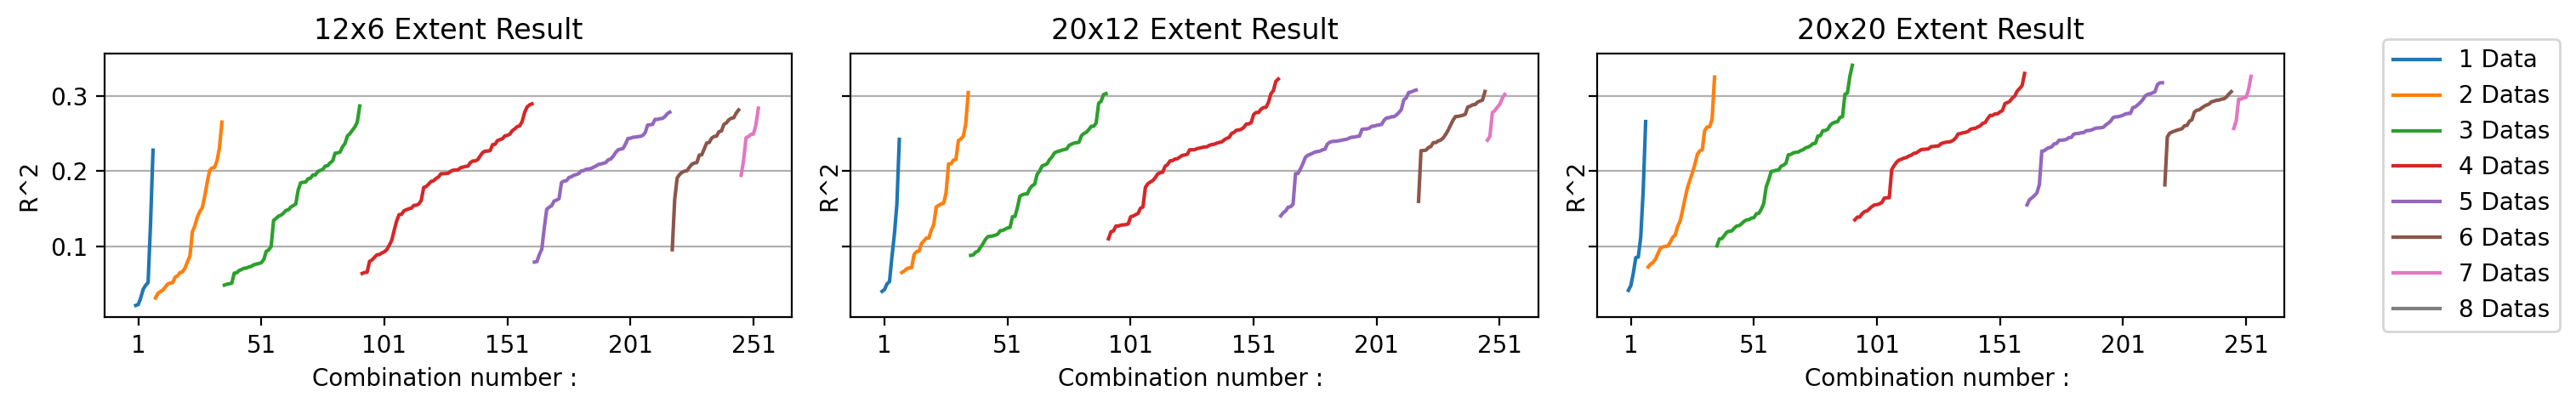

In [5]:
def splitSortResultData(dataFrame, startComb, endComb):
    '''
    Perform split data from single dataframe to n different list for ach combinations, sort, and return its values
    return :
    datas, dlabels
    '''
    idts = mergeNameIdentifier([x for x in range(startComb,endComb+1)])
    datas = []
    dlabels = []
    for idt in idts:
        indvData = []
        indvDataLabel = []
        for s in idt:
            indvData.append(dataFrame[dataFrame.index.str.fullmatch(s)]['test_r2'].values[0])
            indvDataLabel.append(dataFrame[dataFrame.index.str.fullmatch(s)].index[0])
        # sort data
        sortered = sorted(zip(indvData, indvDataLabel))
        indvData = [x for x,y in sortered]
        indvDataLabel = [y for x,y in sortered]
        datas.append(indvData)
        dlabels.append(indvDataLabel)
    return datas, dlabels
    

STARTCOMB = 1
ENDCOMB = 8
labels = ('1 Data', '2 Datas', '3 Datas', '4 Datas', '5 Datas', '6 Datas', '7 Datas', '8 Datas')
titles = ('12x6 Extent Result', '20x12 Extent Result', '20x20 Extent Result')

combinedDataFrames = (pd.DataFrame(manggaraiDNN72).T, pd.DataFrame(manggaraiDNN240).T, pd.DataFrame(manggaraiDNN400).T)



#plt.figure(figsize=(5*len(titles),2))
fig, ax = plt.subplots(1, len(titles), figsize=(5*len(titles), 2.5), sharey=True, dpi=200)

for i, title in enumerate(titles):
    datas, dlabels = splitSortResultData(combinedDataFrames[i], STARTCOMB, ENDCOMB)
    #ax = plt.subplot(1, 3, i+1)
    for j in range(len(datas)):
        ax[i].plot(dlabels[j], datas[j], label=labels[j])
    ax[i].set_title(title)
    ax[i].set_ylabel('R^2')
    ax[i].set_xlabel('Combination number : ')
    ax[i].grid(axis='y')
    ax[i].set_xticks(np.arange(1, len(combinedDataFrames[i])+1, 50))
    ax[i].set_xticklabels(np.arange(1, len(combinedDataFrames[i])+1, 50))
    #ax.set_yticks(np.arange(0,0.35,0.07))
    #ax.set_yticklabels(np.arange(0,0.35,0.07))

ax[i].legend(loc='center right', bbox_to_anchor=(1.4,0.5), borderaxespad=0.)
fig.tight_layout()
plt.show()

In [197]:
len(manggaraiDNN72DF)/18

13.722222222222221

In [7]:
combinedDataFrames[0]

flayer  slayer  epochs  train_r2   test_r2
cloud                                 4.0     6.0   500.0  0.052465  0.042552
psf                                  12.0     6.0   500.0  0.054452  0.051355
qvapor                                4.0     5.0   500.0  0.211509  0.228100
rain                                 16.0     4.0   100.0  0.060847  0.047917
sst                                   4.0     2.0   500.0  0.130772  0.131129
...                                   ...     ...     ...       ...       ...
cloudpsfqvaporsstwindwinuwn10         8.0     6.0   500.0  0.297569  0.249560
cloudpsfrainsstwindwinuwn10          16.0     4.0   500.0  0.257598  0.194566
cloudqvaporrainsstwindwinuwn10       12.0     5.0   250.0  0.313629  0.244617
psfqvaporrainsstwindwinuwn10         16.0     4.0   250.0  0.298422  0.249079
cloudpsfqvaporrainsstwindwinuwn10     8.0     5.0   500.0  0.387878  0.279573

[255 rows x 5 columns]

# Data analysis for Manggarai Result

In [14]:
_, m721 = extractData((14,18),{14:[('cloud',), ('psf',), ('qvapor',), ('rain',), ('sst',)], 18:[('wind',), ('winu',), ('wn10',)]})
m721DF = pd.DataFrame(m721).T
m721DF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
wn10       8.0     3.0   500.0  0.057926  0.021035
winu       4.0     6.0    50.0  0.023883  0.022294
wind      16.0     6.0   100.0  0.048899  0.031062
cloud      4.0     6.0   500.0  0.052465  0.042552
rain      16.0     4.0   100.0  0.060847  0.047917
psf       12.0     6.0   500.0  0.054452  0.051355
sst        4.0     2.0   500.0  0.130772  0.131129
qvapor     4.0     5.0   500.0  0.211509  0.228100

In [16]:
_, m4001 = extractData((29,), {29:[('cloud',), ('psf',), ('qvapor',), ('rain',), ('sst',), ('wind',), ('winu',), ('wn10',)]})
m4001DF = pd.DataFrame(m4001).T
m4001DF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
wn10      16.0     6.0   100.0  0.074710  0.039746
winu      12.0     6.0   100.0  0.066740  0.042250
wind       4.0     4.0   100.0  0.089983  0.049830
cloud      8.0     6.0   250.0  0.069658  0.052677
rain      16.0     2.0   100.0  0.120360  0.086055
psf        8.0     6.0   500.0  0.110408  0.116047
sst       16.0     4.0   500.0  0.154228  0.155707
qvapor     8.0     4.0   500.0  0.244429  0.242480

In [15]:
_, m4001 = extractData((38,), {38:[('cloud',), ('psf',), ('qvapor',), ('rain',), ('sst',), ('wind',), ('winu',), ('wn10',)]})
m4001DF = pd.DataFrame(m4001).T
m4001DF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
winu       8.0     3.0    50.0  0.058553  0.041156
wn10      16.0     6.0   100.0  0.090569  0.047656
cloud     16.0     6.0   500.0  0.103527  0.064242
rain      12.0     5.0   100.0  0.127961  0.084831
wind      16.0     6.0   100.0  0.129189  0.085483
psf        4.0     6.0   500.0  0.106257  0.111819
sst        8.0     1.0   500.0  0.173970  0.173409
qvapor    12.0     5.0   500.0  0.285507  0.266231

In [11]:
# maximum correlation for every extent
pd.DataFrame(manggaraiDNN72).T['test_r2'].max()

0.2898577873472189

In [12]:
# maximum correlation for every extent
pd.DataFrame(manggaraiDNN240).T['test_r2'].max()

0.3229304141792282

In [13]:
# maximum correlation for every extent
pd.DataFrame(manggaraiDNN400).T['test_r2'].max()

0.3412983119655561

In [18]:
# 72 2 data
_, ec = extractData((67,),{67:generateCombinations([x for x in range(2,3)])})
ecDF = pd.DataFrame(ec).T
ecDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwind       4.0     2.0   250.0  0.063537  0.031004
windwinu       12.0     3.0    50.0  0.046899  0.037080
winuwn10       16.0     6.0   100.0  0.051748  0.039519
windwn10       12.0     4.0   250.0  0.105018  0.041535
rainwind        8.0     5.0   250.0  0.094765  0.045533
cloudwn10      16.0     5.0   250.0  0.069330  0.049604
cloudwinu       4.0     4.0   250.0  0.067374  0.050875
cloudrain      16.0     6.0   250.0  0.078595  0.051474
psfwinu        16.0     6.0   500.0  0.064233  0.058767
rainwn10        8.0     5.0   100.0  0.084221  0.060461
psfwind        16.0     1.0   500.0  0.139186  0.064886
rainwinu        8.0     4.0   250.0  0.087387  0.065913
psfwn10        12.0     6.0   500.0  0.078369  0.070827
cloudpsf       12.0     2.0   500.0  0.103858  0.079242
psfrain         8.0     2.0   500.0  0.112726  0.086953
sstwind        16.0     6.0   500.0  0.140565  0.119291
sstwn10         4.0     4.0   250.0  0.145715  0.127109
sstwinu         8.0     5.0   500.0  0.166452  0.138817
cloudsst        8.0     3.0   500.0  0.168295  0.146096
rainsst         8.0     6.0   500.0  0.191613  0.151285
psfsst          8.0     4.0   500.0  0.169765  0.166220
qvaporwind     16.0     3.0   500.0  0.254658  0.184930
qvaporwinu     16.0     3.0   500.0  0.253477  0.200863
qvaporwn10      8.0     4.0   500.0  0.230969  0.204425
cloudqvapor     8.0     2.0   250.0  0.211760  0.204912
qvaporrain     16.0     5.0   500.0  0.254766  0.213879
psfqvapor      16.0     2.0   500.0  0.238007  0.231434
qvaporsst      12.0     2.0   500.0  0.260934  0.265402

In [19]:
# 72 3 data
_, ec = extractData((67,),{67:generateCombinations([x for x in range(3,4)])})
ecDF = pd.DataFrame(ec).T
ecDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwindwinu      16.0     5.0   250.0  0.084734  0.048107
windwinuwn10       12.0     3.0   100.0  0.064099  0.049310
cloudrainwind       8.0     3.0   100.0  0.081156  0.049922
cloudwindwn10       8.0     5.0   500.0  0.119738  0.050686
cloudpsfwind       16.0     2.0   250.0  0.115495  0.064100
cloudrainwn10       8.0     4.0   250.0  0.116055  0.064551
cloudrainwinu      16.0     4.0   250.0  0.099914  0.067632
rainwindwinu       16.0     3.0   100.0  0.111968  0.068966
cloudwinuwn10       4.0     4.0   500.0  0.092400  0.070584
rainwindwn10        8.0     5.0   100.0  0.100146  0.070886
cloudpsfwinu        8.0     1.0   500.0  0.119477  0.072464
psfwindwinu        16.0     2.0   250.0  0.134722  0.073127
rainwinuwn10        8.0     1.0   250.0  0.114490  0.075318
cloudpsfrain       16.0     2.0   500.0  0.144266  0.076156
cloudpsfwn10       12.0     4.0   500.0  0.105781  0.076936
psfwinuwn10         8.0     1.0   500.0  0.114928  0.078070
psfrainwinu        16.0     5.0   500.0  0.110790  0.082178
psfrainwn10        16.0     6.0   500.0  0.134281  0.093093
psfwindwn10        16.0     3.0   250.0  0.135277  0.095116
psfrainwind         8.0     2.0   500.0  0.150993  0.099554
sstwindwinu        12.0     2.0   500.0  0.169086  0.134497
sstwindwn10         4.0     5.0   500.0  0.162476  0.137096
cloudsstwind       16.0     4.0   500.0  0.199691  0.140096
rainsstwind        16.0     3.0   500.0  0.182642  0.141439
sstwinuwn10         8.0     4.0   250.0  0.173469  0.144077
cloudsstwn10       12.0     2.0   500.0  0.196938  0.147699
cloudrainsst        4.0     2.0   500.0  0.210570  0.148540
rainsstwn10        12.0     5.0   250.0  0.189924  0.152224
rainsstwinu        16.0     4.0   500.0  0.202592  0.154192
cloudsstwinu       16.0     6.0   500.0  0.221453  0.156167
psfsstwinu         16.0     2.0   500.0  0.213256  0.174951
psfrainsst          8.0     1.0   500.0  0.216611  0.184574
qvaporwindwinu     16.0     3.0   250.0  0.219277  0.185207
cloudpsfsst         8.0     3.0   500.0  0.201526  0.185536
psfsstwn10         12.0     5.0   500.0  0.220843  0.189910
psfsstwind         16.0     3.0   500.0  0.221368  0.190826
qvaporwinuwn10     16.0     3.0   250.0  0.229018  0.195039
qvaporwindwn10      8.0     2.0   500.0  0.271089  0.195107
qvaporrainwind      8.0     2.0   250.0  0.248672  0.199731
cloudqvaporwind    16.0     6.0   500.0  0.243605  0.201165
qvaporrainwn10      4.0     1.0   100.0  0.206000  0.202429
cloudqvaporwn10    12.0     5.0   500.0  0.243835  0.206845
qvaporrainwinu     16.0     5.0   250.0  0.245087  0.207429
cloudqvaporwinu    16.0     4.0   500.0  0.238588  0.211275
cloudqvaporrain    12.0     3.0   500.0  0.271621  0.213793
psfqvaporrain      12.0     5.0   500.0  0.259217  0.224108
psfqvaporwn10       8.0     5.0   500.0  0.277191  0.224503
psfqvaporwinu      16.0     6.0   500.0  0.270574  0.225436
psfqvaporwind      12.0     5.0   500.0  0.289911  0.232499
cloudpsfqvapor     16.0     6.0   500.0  0.258257  0.236857
qvaporsstwind      16.0     2.0   500.0  0.293174  0.247083
qvaporsstwn10      12.0     5.0   500.0  0.280278  0.250117
qvaporrainsst      16.0     6.0   250.0  0.260585  0.254512
qvaporsstwinu       8.0     5.0   500.0  0.301205  0.258949
cloudqvaporsst     16.0     6.0   500.0  0.287143  0.265455
psfqvaporsst       12.0     4.0   500.0  0.285730  0.286998

In [20]:
# 240 2 data
_, ec = extractData((68,),{68:generateCombinations([x for x in range(2,3)])})
ecDF = pd.DataFrame(ec).T
ecDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwind      12.0     2.0   250.0  0.136685  0.064906
winuwn10        8.0     4.0    50.0  0.081934  0.066926
windwn10        8.0     6.0    50.0  0.117061  0.069982
cloudwinu       4.0     1.0   250.0  0.108698  0.071067
cloudwn10       4.0     2.0   250.0  0.122119  0.071274
cloudrain      16.0     6.0   100.0  0.105909  0.088971
rainwind       16.0     3.0   250.0  0.164111  0.092749
windwinu        8.0     4.0   100.0  0.153501  0.093574
rainwinu        4.0     2.0   250.0  0.178295  0.103572
rainwn10       12.0     4.0   500.0  0.180775  0.107227
psfwn10        12.0     3.0   500.0  0.243182  0.110856
psfwinu         4.0     1.0   500.0  0.142606  0.110938
psfwind        16.0     2.0   250.0  0.228369  0.121573
cloudpsf       16.0     5.0   500.0  0.144962  0.129018
sstwinu         4.0     6.0   500.0  0.187538  0.152491
sstwind         4.0     3.0   500.0  0.239332  0.154415
sstwn10        12.0     5.0   500.0  0.205767  0.156372
psfrain        16.0     5.0   500.0  0.225608  0.157195
cloudsst        4.0     4.0   500.0  0.193844  0.171314
psfsst          4.0     4.0   500.0  0.223680  0.209722
rainsst        12.0     6.0   500.0  0.265824  0.209916
qvaporwn10     12.0     4.0   250.0  0.266643  0.214782
qvaporwind      8.0     4.0   100.0  0.254852  0.215675
cloudqvapor     8.0     5.0   500.0  0.265629  0.240820
qvaporrain     16.0     2.0   250.0  0.292796  0.242931
qvaporwinu      8.0     4.0   100.0  0.267893  0.246754
psfqvapor      16.0     4.0   250.0  0.275214  0.263285
qvaporsst      16.0     5.0   500.0  0.295314  0.304890

In [21]:
# 240 3 data
_, ec = extractData((68,),{68:generateCombinations([x for x in range(3,4)])})
ecDF = pd.DataFrame(ec).T
ecDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwinuwn10      16.0     6.0   500.0  0.175681  0.087756
cloudwindwn10      12.0     5.0   100.0  0.159642  0.088300
cloudrainwind      12.0     4.0   250.0  0.173265  0.092009
cloudwindwinu      16.0     6.0   250.0  0.163578  0.093439
windwinuwn10       12.0     5.0    50.0  0.148939  0.098626
cloudrainwinu       8.0     4.0   500.0  0.191561  0.103354
rainwindwinu       16.0     6.0   100.0  0.171482  0.109039
cloudpsfwn10       12.0     3.0   500.0  0.191438  0.112751
psfwindwn10         8.0     6.0   250.0  0.276998  0.113249
cloudrainwn10      12.0     3.0   250.0  0.188707  0.113742
cloudpsfwind       12.0     5.0   250.0  0.206068  0.114707
psfwinuwn10         4.0     3.0   250.0  0.207077  0.116160
psfwindwinu         4.0     2.0   500.0  0.220578  0.120709
rainwindwn10        8.0     5.0   100.0  0.199626  0.120946
psfrainwind         8.0     3.0   500.0  0.249727  0.122796
rainwinuwn10       12.0     5.0   500.0  0.215334  0.124331
cloudpsfwinu       12.0     3.0   500.0  0.183660  0.125122
psfrainwn10        12.0     4.0   500.0  0.235598  0.139451
psfrainwinu         4.0     5.0   500.0  0.230844  0.139600
cloudpsfrain       16.0     5.0   500.0  0.237920  0.151731
sstwinuwn10         4.0     5.0   250.0  0.234993  0.166703
cloudsstwind        8.0     3.0   500.0  0.238858  0.168501
sstwindwinu         4.0     5.0   250.0  0.263347  0.169663
cloudsstwinu       12.0     1.0   250.0  0.218373  0.169682
sstwindwn10        16.0     6.0   100.0  0.258396  0.176735
rainsstwind        12.0     5.0   250.0  0.299616  0.180739
cloudsstwn10        8.0     4.0   500.0  0.247796  0.182641
rainsstwinu        16.0     3.0   250.0  0.249429  0.195849
cloudrainsst       12.0     5.0   500.0  0.256130  0.200120
rainsstwn10         4.0     4.0   500.0  0.287915  0.207047
psfsstwinu          8.0     5.0   500.0  0.254621  0.208391
psfsstwn10          4.0     2.0   500.0  0.253481  0.209663
psfsstwind         16.0     6.0   500.0  0.305305  0.215229
cloudpsfsst        16.0     6.0   500.0  0.248955  0.218934
qvaporwindwn10     16.0     3.0   250.0  0.335859  0.224272
cloudqvaporwn10    16.0     6.0   100.0  0.254355  0.225981
qvaporrainwn10     12.0     6.0   250.0  0.338222  0.226891
psfrainsst         12.0     4.0   500.0  0.286071  0.228102
psfqvaporwind      16.0     5.0   250.0  0.303384  0.228844
qvaporrainwinu      4.0     3.0   250.0  0.277901  0.229599
cloudqvaporwind    16.0     5.0   250.0  0.313510  0.234521
qvaporwindwinu     16.0     2.0   100.0  0.288608  0.236130
cloudqvaporwinu    12.0     4.0   500.0  0.346152  0.237514
qvaporrainwind     16.0     3.0   100.0  0.319672  0.238139
qvaporwinuwn10     16.0     3.0   100.0  0.269552  0.238535
cloudqvaporrain    12.0     1.0   250.0  0.299094  0.247379
qvaporsstwind       8.0     6.0   500.0  0.350792  0.250341
psfqvaporwinu      16.0     5.0   250.0  0.299181  0.251951
psfqvaporwn10       8.0     3.0   250.0  0.326242  0.255568
qvaporsstwn10      16.0     2.0   100.0  0.308792  0.259905
psfqvaporrain       8.0     4.0   250.0  0.303127  0.259949
cloudpsfqvapor     16.0     1.0   500.0  0.293040  0.264496
psfqvaporsst       12.0     2.0   250.0  0.288491  0.290729
qvaporsstwinu       8.0     2.0   250.0  0.325972  0.293207
qvaporrainsst      16.0     3.0   500.0  0.355044  0.302247
cloudqvaporsst      8.0     1.0   500.0  0.316535  0.303457

In [22]:
# 400 2 data
_, ec = extractData((69,),{69:generateCombinations([x for x in range(2,3)])})
ecDF = pd.DataFrame(ec).T
ecDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwinu       4.0     4.0   100.0  0.097311  0.072338
winuwn10       12.0     6.0   100.0  0.166439  0.076067
cloudwn10      12.0     5.0   250.0  0.161499  0.078436
cloudwind      12.0     3.0   100.0  0.131498  0.082727
cloudrain      12.0     5.0   250.0  0.170132  0.090201
windwinu        8.0     6.0   250.0  0.199991  0.097535
windwn10       16.0     3.0   100.0  0.187326  0.099051
rainwind       16.0     3.0   250.0  0.215583  0.099810
psfwinu        16.0     5.0   500.0  0.182342  0.100165
psfwn10        12.0     5.0   500.0  0.186933  0.105296
rainwinu       12.0     2.0   100.0  0.160413  0.111832
rainwn10        8.0     5.0   100.0  0.173822  0.114715
psfwind         8.0     2.0   250.0  0.201797  0.126307
cloudpsf       12.0     6.0   500.0  0.158693  0.133265
psfrain        12.0     3.0   500.0  0.220795  0.147613
sstwinu         8.0     6.0   250.0  0.221893  0.163437
sstwn10         4.0     4.0   500.0  0.258623  0.178112
sstwind         4.0     4.0   500.0  0.272356  0.188003
cloudsst       16.0     4.0   500.0  0.225725  0.197974
rainsst        12.0     6.0   500.0  0.279403  0.209105
psfsst         16.0     6.0   500.0  0.234459  0.222383
qvaporwind     12.0     5.0   250.0  0.274671  0.227253
qvaporwn10      8.0     6.0   100.0  0.271311  0.228560
qvaporrain     16.0     6.0   250.0  0.328126  0.254225
qvaporwinu     16.0     6.0   100.0  0.285466  0.259002
cloudqvapor     8.0     1.0   500.0  0.291656  0.259220
psfqvapor      12.0     5.0   250.0  0.266396  0.269315
qvaporsst      16.0     5.0   500.0  0.330788  0.325596

In [23]:
# 400 3 data
_, ec = extractData((69,),{69:generateCombinations([x for x in range(3,4)])})
ecDF = pd.DataFrame(ec).T
ecDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwinuwn10       8.0     6.0   100.0  0.175972  0.100452
cloudrainwinu      16.0     6.0   100.0  0.161192  0.109734
cloudwindwinu       4.0     3.0   100.0  0.190815  0.110210
cloudrainwind       8.0     3.0   100.0  0.161348  0.114461
cloudwindwn10       8.0     6.0   100.0  0.197987  0.118843
psfwinuwn10        16.0     5.0   250.0  0.229129  0.120013
cloudrainwn10       4.0     4.0   250.0  0.235005  0.120374
psfwindwn10         4.0     5.0   100.0  0.220923  0.124112
cloudpsfwn10       12.0     4.0   500.0  0.228641  0.126995
windwinuwn10        4.0     1.0   100.0  0.238385  0.127384
rainwindwinu        8.0     4.0   100.0  0.210763  0.130075
cloudpsfwinu        4.0     3.0   500.0  0.217124  0.133079
rainwinuwn10       12.0     6.0   250.0  0.249061  0.135127
psfwindwinu        12.0     3.0   100.0  0.225290  0.135386
cloudpsfwind       12.0     2.0   250.0  0.221629  0.137480
rainwindwn10       12.0     1.0   250.0  0.251749  0.138044
psfrainwinu         4.0     4.0   250.0  0.251059  0.143221
psfrainwn10         8.0     3.0   250.0  0.250516  0.143986
psfrainwind         8.0     6.0   500.0  0.294417  0.149268
cloudpsfrain        8.0     2.0   500.0  0.255378  0.157047
sstwinuwn10        12.0     5.0   250.0  0.287593  0.179265
cloudsstwinu       12.0     4.0   250.0  0.261327  0.188185
sstwindwinu         4.0     3.0   100.0  0.281671  0.199598
rainsstwinu         8.0     2.0   250.0  0.302539  0.200302
cloudsstwind       16.0     6.0   250.0  0.273286  0.201297
cloudsstwn10        8.0     6.0   500.0  0.289753  0.201516
rainsstwind        16.0     4.0   250.0  0.322218  0.206552
sstwindwn10         4.0     3.0   100.0  0.284992  0.208142
psfsstwinu          8.0     6.0   250.0  0.271399  0.210478
rainsstwn10         4.0     5.0   250.0  0.316424  0.221983
cloudqvaporwn10    16.0     2.0   500.0  0.309115  0.222402
qvaporwindwinu      4.0     2.0   100.0  0.285064  0.224538
qvaporwindwn10     12.0     3.0   250.0  0.330898  0.225199
psfsstwn10         16.0     6.0   500.0  0.293978  0.225574
cloudrainsst       16.0     4.0   500.0  0.322755  0.227494
qvaporrainwinu      8.0     5.0    50.0  0.252842  0.228750
qvaporwinuwn10      4.0     5.0    50.0  0.244200  0.231231
psfsstwind         12.0     6.0   250.0  0.306021  0.232181
qvaporrainwn10      8.0     3.0   250.0  0.325703  0.233938
qvaporrainwind     12.0     2.0   100.0  0.331839  0.236861
cloudpsfsst         8.0     2.0   500.0  0.261859  0.237166
psfrainsst         16.0     2.0   500.0  0.317561  0.246955
cloudqvaporwind    16.0     6.0   250.0  0.335780  0.247287
psfqvaporwn10       8.0     3.0   250.0  0.329817  0.254079
cloudqvaporrain    16.0     4.0   500.0  0.376034  0.254327
cloudqvaporwinu    16.0     2.0   250.0  0.311054  0.255954
cloudpsfqvapor     16.0     6.0   500.0  0.281881  0.261402
psfqvaporwinu      16.0     3.0   250.0  0.358487  0.264005
qvaporsstwn10       8.0     2.0   500.0  0.340345  0.265447
psfqvaporrain      16.0     3.0   500.0  0.356496  0.266093
qvaporsstwind       4.0     2.0   500.0  0.337762  0.271751
psfqvaporwind      16.0     6.0   250.0  0.379832  0.272680
qvaporsstwinu      16.0     3.0   100.0  0.327014  0.302628
qvaporrainsst       8.0     4.0   500.0  0.382240  0.304310
cloudqvaporsst     16.0     3.0   500.0  0.349876  0.326692
psfqvaporsst       12.0     5.0   500.0  0.341363  0.341298

In [44]:
# 72
COMB = 8
_, ec = extractData((67,),{67:generateCombinations([x for x in range(COMB,COMB+1)])})
ecDF = pd.DataFrame(ec).T
ecDF['test_r2'].max()

0.2795727740362886

In [45]:
# 240
COMB = 8
_, ec = extractData((68,),{68:generateCombinations([x for x in range(COMB,COMB+1)])})
ecDF = pd.DataFrame(ec).T
ecDF['test_r2'].max()

0.2850300630560741

In [46]:
# 400
COMB = 8
_, ec = extractData((69,),{69:generateCombinations([x for x in range(COMB,COMB+1)])})
ecDF = pd.DataFrame(ec).T
ecDF['test_r2'].max()

0.3056494740788505

# Data analysis for Katulampa Result

In [4]:
# Katulampa scenario data fetch
_, kt16 = extractData((48,49,50,51,52,59,60,61),{48:generateCombinations([x for x in range(1,2)]),
                                               49:generateCombinations([x for x in range(2,3)]),
                                               50:generateCombinations([x for x in range(3,4)]),
                                               51:generateCombinations([x for x in range(4,5)]),
                                               52:generateCombinations([x for x in range(5,6)]),
                                               59:generateCombinations([x for x in range(6,7)]),
                                               60:generateCombinations([x for x in range(7,8)]),
                                               61:generateCombinations([x for x in range(8,9)])})

_, kt784 = extractData((53,54,55,56,57,62,63,64),{53:generateCombinations([x for x in range(1,2)]),
                                               54:generateCombinations([x for x in range(2,3)]),
                                               55:generateCombinations([x for x in range(3,4)]),
                                               56:generateCombinations([x for x in range(4,5)]),
                                               57:generateCombinations([x for x in range(5,6)]),
                                               62:generateCombinations([x for x in range(6,7)]),
                                               63:generateCombinations([x for x in range(7,8)]),
                                               64:generateCombinations([x for x in range(8,9)])})

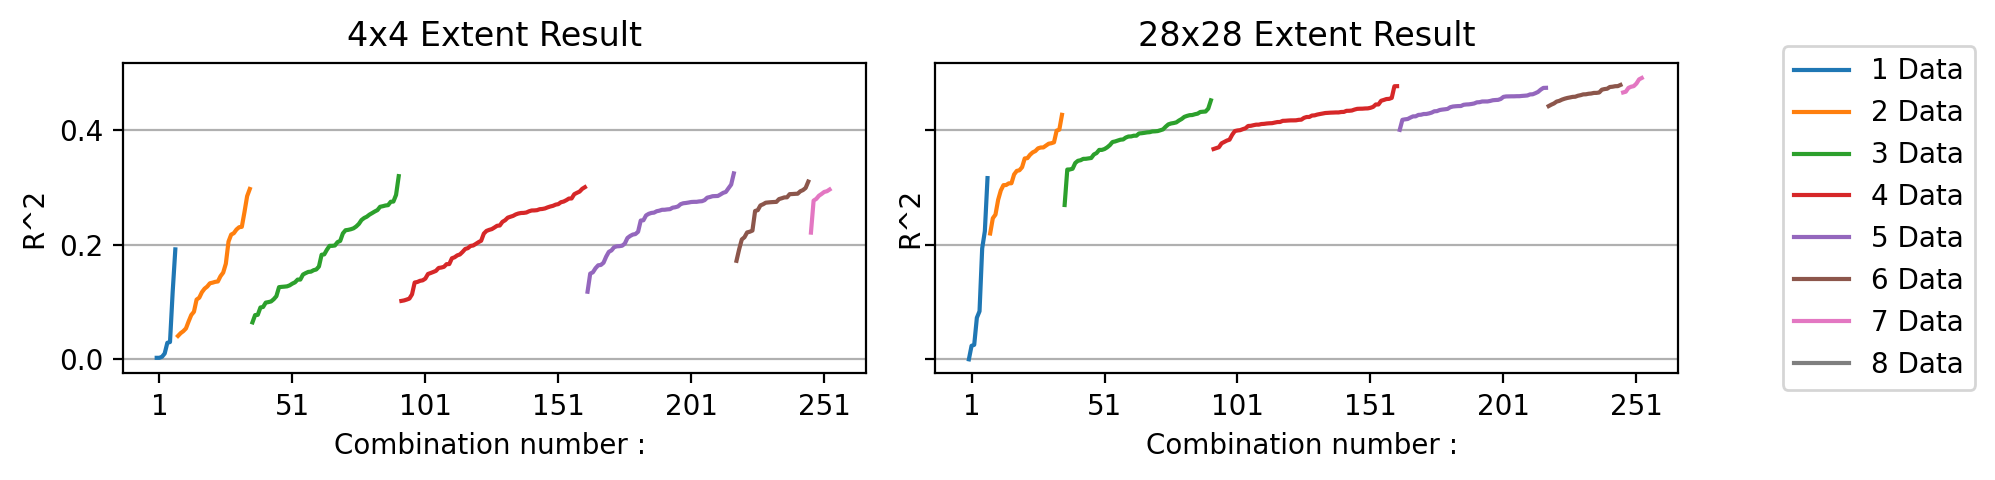

In [5]:
def splitSortResultData(dataFrame, startComb, endComb):
    '''
    Perform split data from single dataframe to n different list for ach combinations, sort, and return its values
    return :
    datas, dlabels
    '''
    idts = mergeNameIdentifier([x for x in range(startComb,endComb+1)])
    datas = []
    dlabels = []
    for idt in idts:
        indvData = []
        indvDataLabel = []
        for s in idt:
            indvData.append(dataFrame[dataFrame.index.str.fullmatch(s)]['test_r2'].values[0])
            indvDataLabel.append(dataFrame[dataFrame.index.str.fullmatch(s)].index[0])
        # sort data
        sortered = sorted(zip(indvData, indvDataLabel))
        indvData = [x for x,y in sortered]
        indvDataLabel = [y for x,y in sortered]
        datas.append(indvData)
        dlabels.append(indvDataLabel)
    return datas, dlabels
    

STARTCOMB = 1
ENDCOMB = 8
labels = ('1 Data', '2 Data', '3 Data', '4 Data', '5 Data', '6 Data', '7 Data', '8 Data')
titles = ('4x4 Extent Result', '28x28 Extent Result')

combinedDataFrames = (pd.DataFrame(kt16).T, pd.DataFrame(kt784).T)



#plt.figure(figsize=(5*len(titles),2))
fig, ax = plt.subplots(1, len(titles), figsize=(5*len(titles), 2.5), sharey=True, dpi=200)

for i, title in enumerate(titles):
    datas, dlabels = splitSortResultData(combinedDataFrames[i], STARTCOMB, ENDCOMB)
    #ax = plt.subplot(1, 3, i+1)
    for j in range(len(datas)):
        ax[i].plot(dlabels[j], datas[j], label=labels[j])
    ax[i].set_title(title)
    ax[i].set_ylabel('R^2')
    ax[i].set_xlabel('Combination number : ')
    ax[i].grid(axis='y')
    ax[i].set_xticks(np.arange(1, len(combinedDataFrames[i])+1, 50))
    ax[i].set_xticklabels(np.arange(1, len(combinedDataFrames[i])+1, 50))
    #ax.set_yticks(np.arange(0,0.35,0.07))
    #ax.set_yticklabels(np.arange(0,0.35,0.07))

ax[i].legend(loc='center right', bbox_to_anchor=(1.4,0.5), borderaxespad=0.)
fig.tight_layout()
plt.show()

In [9]:
# 4x4 max
_, fd = extractData((48,49,50,51,52,59,60,61),{48:generateCombinations([x for x in range(1,2)]),
                                               49:generateCombinations([x for x in range(2,3)]),
                                               50:generateCombinations([x for x in range(3,4)]),
                                               51:generateCombinations([x for x in range(4,5)]),
                                               52:generateCombinations([x for x in range(5,6)]),
                                               59:generateCombinations([x for x in range(6,7)]),
                                               60:generateCombinations([x for x in range(7,8)]),
                                               61:generateCombinations([x for x in range(8,9)])})
fdDF = pd.DataFrame(fd).T
fdDF['test_r2'].max()

0.3247174373125726

In [10]:
# 28x28 max
_, fd = extractData((53,54,55,56,57,62,63,64),{53:generateCombinations([x for x in range(1,2)]),
                                               54:generateCombinations([x for x in range(2,3)]),
                                               55:generateCombinations([x for x in range(3,4)]),
                                               56:generateCombinations([x for x in range(4,5)]),
                                               57:generateCombinations([x for x in range(5,6)]),
                                               62:generateCombinations([x for x in range(6,7)]),
                                               63:generateCombinations([x for x in range(7,8)]),
                                               64:generateCombinations([x for x in range(8,9)])})
fdDF = pd.DataFrame(fd).T
fdDF['test_r2'].max()


0.4933250654465029

In [6]:
# 4x4 single data
_, fd = extractData((48,),{48:generateCombinations([x for x in range(1,2)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
wind       4.0     3.0   250.0  0.004538  0.002768
winu      12.0     5.0    50.0  0.012599  0.002787
wn10       8.0     3.0    50.0  0.009376  0.004570
rain       8.0     5.0   250.0  0.012572  0.010280
cloud      8.0     3.0   500.0  0.024252  0.028982
psf       12.0     6.0   500.0  0.027203  0.030311
qvapor    16.0     6.0   500.0  0.127591  0.117457
sst       16.0     5.0   250.0  0.185451  0.192047

In [8]:
# 28x28 single data
_, fd = extractData((53,),{53:generateCombinations([x for x in range(1,2)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloud     16.0     6.0   100.0 -0.000015  0.000141
rain      12.0     2.0    50.0  0.020611  0.023709
winu      12.0     5.0    50.0  0.064144  0.025418
wn10      12.0     5.0    50.0  0.130628  0.072749
wind      16.0     3.0    50.0  0.124068  0.084051
psf        8.0     6.0   500.0  0.200137  0.193739
qvapor     8.0     6.0   500.0  0.240515  0.223784
sst       12.0     3.0   500.0  0.301658  0.316503

In [12]:
# 4x4 2 data
_, fd = extractData((49,),{49:generateCombinations([x for x in range(2,3)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
windwn10       16.0     2.0    50.0  0.048492  0.040965
winuwn10        8.0     6.0    50.0  0.054550  0.045801
rainwind       16.0     1.0    50.0  0.051929  0.049284
windwinu       16.0     4.0   250.0  0.061967  0.054043
rainwn10       16.0     2.0   250.0  0.092698  0.066270
rainwinu       12.0     6.0   100.0  0.087915  0.077549
psfwn10         4.0     2.0   500.0  0.102804  0.083132
psfwinu        12.0     5.0   500.0  0.136899  0.104421
psfwind         4.0     6.0   500.0  0.122125  0.107710
cloudwind       4.0     6.0   500.0  0.112101  0.117345
cloudrain      12.0     3.0   500.0  0.139637  0.123476
cloudwn10      16.0     6.0   500.0  0.174688  0.127162
psfrain         8.0     3.0   500.0  0.142503  0.132876
cloudwinu       8.0     6.0   500.0  0.150951  0.133934
sstwn10        16.0     2.0   500.0  0.157198  0.135370
sstwind        12.0     2.0   500.0  0.168040  0.136050
sstwinu        16.0     3.0   500.0  0.193232  0.145313
rainsst         4.0     2.0   500.0  0.160633  0.151504
cloudpsf       12.0     2.0   500.0  0.169704  0.167140
psfsst         16.0     6.0   500.0  0.223427  0.205673
qvaporwind      8.0     5.0   500.0  0.233340  0.217839
cloudsst       12.0     4.0   500.0  0.216132  0.220343
qvaporrain     12.0     6.0   500.0  0.255965  0.226763
qvaporwn10     16.0     6.0   500.0  0.250504  0.230777
qvaporwinu     12.0     1.0   250.0  0.216982  0.231376
cloudqvapor    12.0     6.0   500.0  0.256386  0.257150
psfqvapor      16.0     6.0   500.0  0.293482  0.284947
qvaporsst      16.0     6.0   500.0  0.299988  0.297496

In [13]:
# 28x28 2 data
_, fd = extractData((54,),{54:generateCombinations([x for x in range(2,3)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudwinu      12.0     5.0   100.0  0.285102  0.219796
rainwinu        8.0     6.0   100.0  0.309976  0.246405
cloudrain       4.0     4.0   500.0  0.344820  0.252777
winuwn10        4.0     6.0    50.0  0.342574  0.278540
windwinu       12.0     5.0   100.0  0.442121  0.294884
sstwinu         8.0     2.0   500.0  0.395664  0.304162
windwn10       12.0     4.0    50.0  0.384765  0.304386
cloudwind      16.0     6.0   100.0  0.373018  0.307349
cloudwn10      12.0     6.0   250.0  0.426363  0.307452
psfwinu         4.0     3.0   250.0  0.399021  0.322872
qvaporwinu      4.0     2.0   100.0  0.374330  0.329031
rainwn10        8.0     6.0   100.0  0.387186  0.330156
rainwind        8.0     4.0   100.0  0.410740  0.335494
psfwn10        12.0     4.0   100.0  0.378020  0.350823
qvaporrain     12.0     3.0   500.0  0.445425  0.351310
cloudqvapor    12.0     5.0   500.0  0.404428  0.357230
psfwind         8.0     6.0   250.0  0.445021  0.361413
cloudpsf        4.0     1.0   500.0  0.368529  0.363670
cloudsst       12.0     5.0   500.0  0.369373  0.368420
psfrain        16.0     5.0   250.0  0.405135  0.369871
sstwn10        16.0     4.0   100.0  0.392717  0.370010
sstwind         8.0     6.0   500.0  0.465073  0.373259
qvaporwn10     16.0     4.0   250.0  0.469245  0.376481
qvaporwind      8.0     6.0   100.0  0.437796  0.377352
rainsst        12.0     3.0   500.0  0.427864  0.378922
qvaporsst      16.0     5.0   500.0  0.388505  0.399366
psfsst          4.0     6.0   500.0  0.382228  0.400996
psfqvapor      16.0     3.0   500.0  0.424759  0.426932

In [14]:
# 4x4 3 data
_, fd = extractData((50,),{50:generateCombinations([x for x in range(3,4)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
windwinuwn10        8.0     5.0   250.0  0.091830  0.064636
rainwindwn10       16.0     3.0   100.0  0.089479  0.077357
rainwindwinu        8.0     4.0   250.0  0.069239  0.077765
rainwinuwn10       16.0     2.0   100.0  0.106764  0.090614
psfwindwn10         4.0     6.0   500.0  0.108216  0.091520
psfwindwinu         4.0     5.0   500.0  0.107501  0.099114
psfwinuwn10         4.0     6.0   500.0  0.114991  0.100015
psfrainwn10         4.0     6.0   500.0  0.123574  0.101178
psfrainwind        12.0     2.0   500.0  0.141184  0.105026
psfrainwinu         8.0     3.0   500.0  0.128096  0.110384
cloudwindwn10       4.0     6.0   500.0  0.139532  0.126132
sstwindwn10        12.0     4.0   500.0  0.193295  0.126623
cloudwindwinu       4.0     6.0   500.0  0.128006  0.127018
cloudrainwn10       8.0     4.0   250.0  0.138037  0.127520
sstwinuwn10         4.0     4.0   500.0  0.147037  0.129284
cloudrainwind       8.0     1.0   500.0  0.132879  0.132259
cloudwinuwn10       8.0     5.0   500.0  0.137928  0.134544
cloudrainwinu       8.0     3.0   500.0  0.163362  0.139329
sstwindwinu        12.0     2.0   500.0  0.158645  0.139330
cloudpsfrain       12.0     2.0   500.0  0.174378  0.148093
cloudpsfwind       12.0     1.0   250.0  0.162503  0.150609
cloudpsfwinu       12.0     6.0   500.0  0.196197  0.152706
rainsstwind        12.0     3.0   500.0  0.169360  0.153189
rainsstwinu        16.0     6.0   250.0  0.182637  0.155689
cloudpsfwn10        8.0     6.0   500.0  0.194204  0.156979
rainsstwn10         8.0     6.0   500.0  0.192358  0.162119
psfsstwn10          8.0     4.0   500.0  0.223445  0.182680
psfsstwinu         12.0     4.0   500.0  0.208145  0.183332
psfsstwind          8.0     4.0   500.0  0.206247  0.191498
cloudsstwn10        8.0     3.0   500.0  0.219481  0.198191
cloudsstwind       16.0     2.0   500.0  0.203525  0.198214
cloudrainsst        8.0     5.0   500.0  0.208771  0.198829
cloudsstwinu        4.0     6.0   500.0  0.212075  0.204746
psfrainsst         12.0     5.0   500.0  0.245579  0.206909
qvaporwindwinu     12.0     3.0   500.0  0.239864  0.219946
qvaporwindwn10     16.0     5.0   500.0  0.274910  0.225455
qvaporwinuwn10      8.0     6.0   500.0  0.256966  0.226128
qvaporrainwind     12.0     5.0   250.0  0.235874  0.227212
cloudpsfsst        12.0     5.0   500.0  0.236532  0.228818
qvaporrainwn10     16.0     1.0   250.0  0.257631  0.232001
qvaporrainwinu     12.0     6.0   250.0  0.247907  0.236457
cloudqvaporwn10    16.0     3.0   500.0  0.255748  0.243254
cloudqvaporwinu     8.0     4.0   500.0  0.255966  0.246831
cloudqvaporwind    12.0     4.0   500.0  0.253568  0.249105
qvaporsstwind      12.0     2.0   500.0  0.261991  0.252721
psfqvaporwind       8.0     3.0   500.0  0.245745  0.255413
psfqvaporwn10      12.0     4.0   500.0  0.270653  0.258206
cloudqvaporrain    12.0     6.0   500.0  0.281844  0.260627
cloudpsfqvapor      8.0     3.0   500.0  0.271387  0.266400
psfqvaporrain      12.0     4.0   500.0  0.289208  0.267400
psfqvaporwinu       4.0     5.0   500.0  0.269310  0.268631
qvaporsstwinu      12.0     2.0   500.0  0.265996  0.269276
qvaporsstwn10       8.0     5.0   500.0  0.284358  0.275174
qvaporrainsst      12.0     4.0   500.0  0.297001  0.275553
cloudqvaporsst     12.0     5.0   500.0  0.277757  0.287146
psfqvaporsst       16.0     4.0   500.0  0.325949  0.319898

In [15]:
# 28x28 3 data
_, fd = extractData((55,),{55:generateCombinations([x for x in range(3,4)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudrainwinu      16.0     4.0   100.0  0.335289  0.269526
cloudwindwinu       4.0     3.0    50.0  0.401739  0.331377
cloudwinuwn10      12.0     5.0    50.0  0.383043  0.331611
windwinuwn10       16.0     5.0    50.0  0.416446  0.332843
cloudwindwn10       4.0     3.0   100.0  0.434598  0.342856
cloudrainwn10      16.0     5.0   100.0  0.411934  0.346673
cloudrainwind      16.0     2.0   100.0  0.425311  0.347685
cloudqvaporwinu     8.0     4.0   100.0  0.397772  0.350029
rainwinuwn10        8.0     6.0   100.0  0.441199  0.350200
cloudsstwinu       16.0     4.0   500.0  0.462163  0.350892
cloudpsfwinu        4.0     6.0   250.0  0.434412  0.351565
rainwindwinu        8.0     6.0    50.0  0.438651  0.357726
psfrainwinu        16.0     5.0   250.0  0.451994  0.360169
rainwindwn10       16.0     4.0   100.0  0.454144  0.365680
rainsstwinu         8.0     4.0   100.0  0.395772  0.365698
cloudqvaporrain     4.0     3.0   250.0  0.432811  0.367252
qvaporrainwinu      4.0     2.0   100.0  0.446146  0.370141
psfwinuwn10        16.0     1.0   100.0  0.445868  0.374022
psfwindwn10        16.0     1.0   100.0  0.449796  0.379469
psfwindwinu        12.0     5.0   100.0  0.459870  0.380473
cloudpsfwind        8.0     4.0   100.0  0.411908  0.382059
cloudqvaporwind     4.0     2.0   100.0  0.435778  0.383515
cloudpsfwn10        8.0     5.0   100.0  0.400396  0.383975
qvaporwinuwn10      8.0     3.0    50.0  0.418923  0.387277
cloudqvaporwn10     8.0     2.0   100.0  0.423749  0.389066
sstwinuwn10        12.0     4.0   100.0  0.448585  0.389232
qvaporwindwinu     12.0     6.0    50.0  0.451818  0.390470
cloudsstwn10       12.0     4.0   500.0  0.477345  0.390518
sstwindwinu        16.0     6.0   100.0  0.465352  0.394451
sstwindwn10        12.0     4.0   100.0  0.443865  0.394844
qvaporsstwinu      12.0     6.0   250.0  0.444832  0.395495
psfrainwn10        16.0     5.0   100.0  0.433751  0.396283
cloudpsfrain       12.0     5.0   500.0  0.458534  0.396658
psfrainwind         4.0     2.0   100.0  0.446257  0.397906
cloudsstwind       12.0     4.0   500.0  0.492929  0.398120
psfqvaporwinu       4.0     4.0   250.0  0.468018  0.398585
cloudrainsst        8.0     6.0   500.0  0.457242  0.399988
qvaporwindwn10     12.0     2.0    50.0  0.449816  0.401526
qvaporrainwind     12.0     2.0    50.0  0.456247  0.406266
psfsstwinu         16.0     4.0   500.0  0.550866  0.410256
psfqvaporrain       4.0     4.0   500.0  0.492157  0.411817
psfqvaporwind      12.0     2.0   100.0  0.451000  0.412618
cloudpsfqvapor      4.0     1.0   500.0  0.435356  0.413768
qvaporrainwn10     16.0     4.0   100.0  0.465879  0.417018
rainsstwn10        12.0     5.0   100.0  0.460219  0.419675
qvaporsstwind      16.0     3.0   100.0  0.445642  0.423353
qvaporrainsst       8.0     5.0   500.0  0.493571  0.425038
qvaporsstwn10       4.0     5.0   250.0  0.474422  0.426322
psfsstwn10         12.0     3.0   500.0  0.512315  0.426591
psfsstwind          4.0     5.0   250.0  0.503393  0.427998
cloudpsfsst        16.0     6.0   500.0  0.414363  0.428977
rainsstwind        12.0     3.0   250.0  0.539800  0.431881
psfrainsst          8.0     4.0   500.0  0.471733  0.432342
psfqvaporwn10      12.0     3.0   100.0  0.473509  0.432730
cloudqvaporsst     16.0     3.0   500.0  0.458617  0.437802
psfqvaporsst       12.0     5.0   500.0  0.442261  0.452211

In [16]:
# 4x4 4 data
_, fd = extractData((51,),{51:generateCombinations([x for x in range(4,5)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
rainwindwinuwn10      12.0     1.0   250.0  0.117020  0.102074
psfrainwindwn10        8.0     5.0   500.0  0.127737  0.102946
psfwindwinuwn10       12.0     2.0   500.0  0.154466  0.104432
psfrainwindwinu        8.0     3.0   500.0  0.107273  0.106115
psfrainwinuwn10       12.0     1.0   100.0  0.122478  0.113544
...                    ...     ...     ...       ...       ...
psfqvaporsstwind      12.0     6.0   500.0  0.308998  0.288336
cloudqvaporrainsst    16.0     6.0   500.0  0.338033  0.290786
psfqvaporrainsst       8.0     6.0   500.0  0.319283  0.292935
psfqvaporsstwn10      16.0     6.0   500.0  0.335436  0.297754
cloudpsfqvaporsst     12.0     4.0   500.0  0.301280  0.300606

[70 rows x 5 columns]

In [17]:
# 28x28 4 data
_, fd = extractData((56,),{56:generateCombinations([x for x in range(4,5)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudrainwinuwn10      16.0     1.0    50.0  0.419864  0.367233
cloudwindwinuwn10      12.0     4.0    50.0  0.443642  0.368795
cloudrainwindwinu       4.0     3.0   100.0  0.488010  0.370303
cloudrainwindwn10      12.0     4.0   100.0  0.442353  0.377139
cloudqvaporrainwinu    12.0     4.0   100.0  0.423744  0.379548
...                     ...     ...     ...       ...       ...
psfqvaporsstwind       16.0     5.0   250.0  0.497376  0.454474
qvaporrainsstwn10      16.0     5.0   100.0  0.494241  0.454801
qvaporrainsstwind      16.0     6.0   100.0  0.486745  0.456499
cloudpsfqvaporsst      12.0     3.0   500.0  0.495668  0.476834
psfqvaporrainsst        4.0     3.0   500.0  0.545420  0.476956

[70 rows x 5 columns]

In [18]:
# 4x4 5 data
_, fd = extractData((52,),{52:generateCombinations([x for x in range(5,6)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
psfrainwindwinuwn10        12.0     2.0   100.0  0.126097  0.118154
cloudrainwindwinuwn10      16.0     4.0   500.0  0.190974  0.149753
cloudpsfrainwindwn10        8.0     5.0   500.0  0.176966  0.152006
cloudpsfrainwindwinu        8.0     4.0   500.0  0.184258  0.159170
cloudpsfwindwinuwn10       12.0     3.0   500.0  0.191015  0.164256
rainsstwindwinuwn10         4.0     4.0   500.0  0.187215  0.164853
cloudpsfrainwinuwn10        8.0     6.0   500.0  0.210649  0.168699
psfsstwindwinuwn10         12.0     4.0   500.0  0.253889  0.179362
psfrainsstwindwn10         16.0     5.0   500.0  0.250153  0.187712
psfrainsstwinuwn10         12.0     5.0   500.0  0.219212  0.190265
psfrainsstwindwinu          4.0     4.0   500.0  0.227979  0.195885
cloudrainsstwinuwn10       16.0     3.0   500.0  0.243330  0.197379
cloudrainsstwindwinu       12.0     6.0   500.0  0.256640  0.197669
cloudsstwindwinuwn10       16.0     2.0   500.0  0.239875  0.198431
cloudrainsstwindwn10        8.0     4.0   500.0  0.249841  0.202096
cloudpsfsstwinuwn10        16.0     6.0   250.0  0.265187  0.211938
cloudpsfrainsstwn10         4.0     6.0   500.0  0.251224  0.215384
cloudpsfsstwindwn10        16.0     3.0   500.0  0.250346  0.217887
cloudpsfrainsstwinu        16.0     6.0   500.0  0.278438  0.218801
cloudpsfrainsstwind         8.0     6.0   500.0  0.235582  0.222790
qvaporrainwindwinuwn10      8.0     6.0   250.0  0.246598  0.242442
cloudpsfsstwindwinu        12.0     3.0   500.0  0.260124  0.242860
cloudqvaporwindwinuwn10    16.0     6.0   250.0  0.256897  0.251349
cloudqvaporrainwinuwn10     8.0     5.0   500.0  0.288326  0.254107
cloudqvaporrainwindwn10     8.0     3.0   250.0  0.280234  0.255671
qvaporsstwindwinuwn10       8.0     3.0   500.0  0.271333  0.256209
qvaporrainsstwindwn10      16.0     4.0   250.0  0.284666  0.258640
qvaporrainsstwinuwn10       8.0     1.0   250.0  0.271414  0.259631
cloudqvaporrainwindwinu    16.0     5.0   500.0  0.273969  0.261149
cloudpsfqvaporwindwn10     16.0     3.0   250.0  0.277342  0.261228
psfqvaporrainwindwinu      16.0     6.0   250.0  0.290691  0.261869
psfqvaporrainwinuwn10      12.0     3.0   250.0  0.282698  0.262243
psfqvaporwindwinuwn10       8.0     4.0   500.0  0.281714  0.264857
qvaporrainsstwindwinu      12.0     5.0   500.0  0.272298  0.265620
cloudqvaporsstwindwinu      8.0     4.0   500.0  0.281981  0.266996
cloudpsfqvaporwindwinu     16.0     3.0   500.0  0.297934  0.270950
cloudqvaporsstwinuwn10     12.0     6.0   500.0  0.275716  0.272558
cloudpsfqvaporrainwind     12.0     3.0   500.0  0.287321  0.273092
cloudpsfqvaporrainwinu     16.0     4.0   500.0  0.303603  0.273853
psfqvaporrainwindwn10      16.0     5.0   500.0  0.308063  0.274751
psfqvaporsstwindwn10        4.0     2.0   500.0  0.289599  0.275019
cloudqvaporsstwindwn10     16.0     1.0   500.0  0.298074  0.275056
cloudpsfqvaporwinuwn10     16.0     6.0   500.0  0.297089  0.275795
cloudpsfqvaporrainwn10     16.0     4.0   500.0  0.307252  0.276150
cloudqvaporrainsstwinu     12.0     3.0   500.0  0.310488  0.277984
cloudqvaporrainsstwn10     12.0     6.0   500.0  0.317276  0.282331
psfqvaporsstwinuwn10       16.0     6.0   500.0  0.331155  0.283411
psfqvaporrainsstwinu        8.0     5.0   500.0  0.314895  0.284852
psfqvaporrainsstwn10        8.0     4.0   500.0  0.327404  0.285111
psfqvaporsstwindwinu       12.0     3.0   500.0  0.284114  0.285307
cloudpsfqvaporsstwinu       8.0     6.0   500.0  0.300042  0.287975
cloudqvaporrainsstwind     12.0     4.0   500.0  0.318215  0.290766
psfqvaporrainsstwind        8.0     3.0   500.0  0.328537  0.292304
cloudpsfqvaporsstwn10      16.0     5.0   500.0  0.324421  0.298824
cloudpsfqvaporsstwind      16.0     6.0   500.0  0.311854  0.305143
cloudpsfqvaporrainsst      12.0     3.0   500.0  0.329759  0.324717

In [19]:
# 28x28 5 data
_, fd = extractData((57,),{57:generateCombinations([x for x in range(5,6)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudrainwindwinuwn10      12.0     6.0   100.0  0.508996  0.400708
cloudpsfrainwinuwn10        8.0     6.0    50.0  0.445511  0.418213
cloudpsfqvaporrainwinu      8.0     6.0   250.0  0.544126  0.419062
cloudpsfwindwinuwn10        8.0     4.0   100.0  0.502794  0.419670
cloudqvaporrainsstwinu     16.0     6.0   250.0  0.520344  0.422093
cloudpsfrainsstwinu        12.0     6.0   250.0  0.525523  0.424217
cloudpsfrainwindwinu       12.0     4.0   100.0  0.510083  0.424313
cloudqvaporrainwindwinu    16.0     4.0   100.0  0.505377  0.426770
cloudpsfrainwindwn10       16.0     6.0   100.0  0.484316  0.427103
psfrainwindwinuwn10        16.0     5.0    50.0  0.479230  0.428350
cloudqvaporwindwinuwn10     8.0     6.0    50.0  0.492948  0.428419
cloudqvaporrainwindwn10    16.0     6.0   100.0  0.512251  0.429413
cloudqvaporrainwinuwn10     8.0     6.0   100.0  0.519372  0.430776
cloudpsfqvaporwindwinu     12.0     6.0    50.0  0.456071  0.433080
cloudsstwindwinuwn10        8.0     2.0   100.0  0.522238  0.433389
cloudpsfqvaporwinuwn10     12.0     4.0    50.0  0.462142  0.435281
cloudrainsstwindwn10       16.0     2.0   100.0  0.498294  0.436058
cloudqvaporsstwindwinu      8.0     4.0   100.0  0.484520  0.436609
cloudrainsstwinuwn10        4.0     6.0   100.0  0.505029  0.437273
cloudpsfqvaporrainwind      8.0     4.0   250.0  0.555508  0.440224
cloudpsfqvaporwindwn10      4.0     3.0   100.0  0.503873  0.441423
cloudrainsstwindwinu       12.0     6.0   100.0  0.515566  0.441898
cloudpsfsstwindwn10         4.0     3.0   100.0  0.486221  0.442221
psfqvaporwindwinuwn10       8.0     4.0    50.0  0.503382  0.442296
psfqvaporrainwindwinu      12.0     2.0   100.0  0.542166  0.444423
qvaporrainwindwinuwn10     12.0     6.0   100.0  0.555081  0.444990
cloudpsfsstwinuwn10         8.0     5.0   100.0  0.484196  0.445215
cloudqvaporsstwinuwn10     12.0     2.0    50.0  0.465922  0.445876
cloudpsfqvaporrainwn10      4.0     2.0   250.0  0.527205  0.446772
psfqvaporrainwindwn10      12.0     4.0    50.0  0.491724  0.448721
cloudpsfsstwindwinu        16.0     6.0   100.0  0.494996  0.449000
cloudpsfrainsstwn10        12.0     5.0   250.0  0.549104  0.450207
cloudqvaporsstwindwn10      8.0     3.0   250.0  0.564734  0.450279
psfqvaporrainwinuwn10      16.0     5.0   100.0  0.520084  0.450297
rainsstwindwinuwn10        12.0     3.0   100.0  0.551784  0.451158
psfqvaporrainsstwinu        4.0     4.0   250.0  0.539973  0.452358
psfsstwindwinuwn10         12.0     5.0   100.0  0.537867  0.452783
cloudpsfqvaporsstwinu       4.0     3.0   500.0  0.526939  0.453061
qvaporsstwindwinuwn10       8.0     3.0   100.0  0.540485  0.454665
cloudpsfrainsstwind         8.0     5.0   250.0  0.529502  0.458245
cloudqvaporrainsstwind      8.0     3.0   250.0  0.553588  0.459034
psfrainsstwindwinu         16.0     4.0   100.0  0.516526  0.459134
cloudqvaporrainsstwn10     12.0     2.0   100.0  0.493744  0.459239
qvaporrainsstwindwn10       8.0     3.0   100.0  0.531570  0.459255
psfqvaporsstwindwn10        8.0     3.0   100.0  0.515175  0.459452
cloudpsfqvaporsstwind      16.0     6.0   100.0  0.471645  0.459459
psfrainsstwinuwn10          8.0     6.0   100.0  0.503245  0.459950
cloudpsfqvaporsstwn10       8.0     3.0   500.0  0.535989  0.460275
psfrainsstwindwn10         16.0     6.0   100.0  0.513136  0.460727
qvaporrainsstwindwinu      16.0     6.0   100.0  0.534871  0.462538
psfqvaporsstwinuwn10        8.0     5.0   100.0  0.503014  0.462808
psfqvaporsstwindwinu        8.0     3.0   100.0  0.515093  0.464688
qvaporrainsstwinuwn10      12.0     6.0   100.0  0.532920  0.466908
psfqvaporrainsstwind        4.0     5.0   250.0  0.552169  0.470867
cloudpsfqvaporrainsst      16.0     5.0   500.0  0.530377  0.473904
psfqvaporrainsstwn10        4.0     6.0   250.0  0.545212  0.474072

In [20]:
# 4x4 6 data
_, fd = extractData((59,),{59:generateCombinations([x for x in range(6,7)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudpsfrainwindwinuwn10       12.0     3.0   500.0  0.217650  0.172096
psfrainsstwindwinuwn10         16.0     4.0   500.0  0.262215  0.192171
cloudrainsstwindwinuwn10        4.0     4.0   500.0  0.232908  0.209378
cloudpsfsstwindwinuwn10        12.0     6.0   250.0  0.238350  0.213239
cloudpsfrainsstwindwinu        16.0     2.0   500.0  0.255027  0.221659
cloudpsfrainsstwindwn10        16.0     6.0   500.0  0.288457  0.222872
cloudpsfrainsstwinuwn10        16.0     6.0   500.0  0.261974  0.224871
cloudqvaporrainwindwinuwn10    16.0     5.0   250.0  0.281184  0.259067
psfqvaporrainwindwinuwn10      12.0     6.0   500.0  0.337980  0.260536
cloudpsfqvaporrainwinuwn10     16.0     3.0   500.0  0.317761  0.268777
cloudpsfqvaporrainwindwn10     16.0     4.0   250.0  0.298147  0.270808
cloudqvaporrainsstwinuwn10     12.0     6.0   500.0  0.324637  0.273527
qvaporrainsstwindwinuwn10      12.0     4.0   500.0  0.297561  0.274009
cloudqvaporrainsstwindwn10     12.0     6.0   500.0  0.296912  0.274443
cloudpsfqvaporwindwinuwn10     12.0     3.0   500.0  0.305609  0.274739
cloudpsfqvaporrainwindwinu     16.0     3.0   500.0  0.313384  0.274960
cloudpsfqvaporsstwindwinu      16.0     3.0   500.0  0.327405  0.279842
cloudqvaporsstwindwinuwn10     16.0     5.0   500.0  0.330972  0.281244
cloudqvaporrainsstwindwinu      4.0     2.0   500.0  0.303102  0.282792
psfqvaporsstwindwinuwn10       16.0     4.0   500.0  0.309166  0.282938
cloudpsfqvaporrainsstwinu      16.0     3.0   250.0  0.308232  0.288460
cloudpsfqvaporsstwindwn10       8.0     5.0   500.0  0.312181  0.288670
psfqvaporrainsstwindwinu       12.0     2.0   500.0  0.335452  0.288992
cloudpsfqvaporsstwinuwn10      16.0     5.0   500.0  0.321206  0.289245
psfqvaporrainsstwindwn10       12.0     5.0   500.0  0.358765  0.293452
psfqvaporrainsstwinuwn10       12.0     5.0   500.0  0.335106  0.295561
cloudpsfqvaporrainsstwn10       4.0     1.0   500.0  0.326184  0.299287
cloudpsfqvaporrainsstwind      12.0     4.0   500.0  0.337587  0.310423

In [21]:
# 28x28 6 data
_, fd = extractData((62,),{62:generateCombinations([x for x in range(6,7)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudqvaporrainwindwinuwn10    16.0     5.0   100.0  0.565591  0.442190
cloudpsfrainwindwinuwn10        8.0     4.0   100.0  0.536893  0.444704
cloudpsfqvaporwindwinuwn10      8.0     6.0   100.0  0.534423  0.446806
cloudpsfqvaporrainwinuwn10      8.0     3.0    50.0  0.483684  0.450069
cloudpsfqvaporrainwindwinu      8.0     4.0   100.0  0.541144  0.451294
cloudpsfrainsstwinuwn10         4.0     4.0    50.0  0.474535  0.453473
cloudrainsstwindwinuwn10       12.0     4.0   100.0  0.553194  0.455080
cloudpsfqvaporrainwindwn10     12.0     5.0   100.0  0.528314  0.456353
cloudpsfsstwindwinuwn10         4.0     4.0   100.0  0.537926  0.457256
psfqvaporrainwindwinuwn10       4.0     6.0    50.0  0.520525  0.458250
cloudpsfqvaporrainsstwinu      16.0     5.0   250.0  0.533255  0.458520
cloudpsfrainsstwindwn10        12.0     4.0   100.0  0.511220  0.460237
cloudqvaporsstwindwinuwn10      8.0     5.0    50.0  0.508200  0.461224
cloudqvaporrainsstwindwinu     12.0     2.0   100.0  0.545899  0.462611
cloudpsfrainsstwindwinu        12.0     6.0   100.0  0.526770  0.462782
cloudpsfqvaporsstwinuwn10       8.0     2.0   250.0  0.558868  0.463710
cloudqvaporrainsstwinuwn10     12.0     4.0   100.0  0.501321  0.464141
cloudpsfqvaporsstwindwinu       8.0     5.0   100.0  0.517367  0.465173
cloudpsfqvaporsstwindwn10      12.0     2.0   100.0  0.506262  0.465242
cloudqvaporrainsstwindwn10      8.0     6.0   100.0  0.537723  0.465916
psfqvaporsstwindwinuwn10       12.0     3.0    50.0  0.511038  0.470781
psfqvaporrainsstwinuwn10       12.0     6.0   250.0  0.604738  0.471900
cloudpsfqvaporrainsstwind      16.0     4.0   500.0  0.590432  0.472494
psfrainsstwindwinuwn10         12.0     5.0   100.0  0.545516  0.475506
psfqvaporrainsstwindwn10       12.0     3.0   100.0  0.524179  0.475977
qvaporrainsstwindwinuwn10      16.0     6.0   250.0  0.533535  0.476876
cloudpsfqvaporrainsstwn10      16.0     6.0   250.0  0.552078  0.477030
psfqvaporrainsstwindwinu       12.0     3.0   100.0  0.537548  0.479079

In [22]:
# 4x4 7 data
_, fd = extractData((60,),{60:generateCombinations([x for x in range(7,8)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudpsfrainsstwindwinuwn10        4.0     3.0   500.0  0.243910  0.221330
cloudpsfqvaporrainwindwinuwn10    12.0     3.0   500.0  0.325419  0.277197
cloudqvaporrainsstwindwinuwn10     4.0     1.0   500.0  0.298294  0.280185
cloudpsfqvaporrainsstwinuwn10     16.0     5.0   500.0  0.336462  0.285671
cloudpsfqvaporrainsstwindwn10     12.0     5.0   250.0  0.325865  0.288818
cloudpsfqvaporrainsstwindwinu     16.0     5.0   500.0  0.315299  0.292340
psfqvaporrainsstwindwinuwn10      16.0     4.0   500.0  0.348270  0.293538
cloudpsfqvaporsstwindwinuwn10     16.0     1.0   500.0  0.318837  0.296532

In [23]:
# 28x28 7 data
_, fd = extractData((63,),{63:generateCombinations([x for x in range(7,8)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

flayer  slayer  epochs  train_r2   test_r2
cloudpsfqvaporsstwindwinuwn10      8.0     3.0   100.0  0.527699  0.465997
cloudpsfqvaporrainwindwinuwn10     4.0     4.0   100.0  0.552675  0.467306
cloudpsfqvaporrainsstwinuwn10     12.0     4.0    50.0  0.495339  0.473915
cloudpsfrainsstwindwinuwn10       16.0     6.0   100.0  0.547475  0.475972
cloudqvaporrainsstwindwinuwn10    12.0     4.0   100.0  0.560890  0.477037
cloudpsfqvaporrainsstwindwn10      8.0     3.0   100.0  0.540107  0.481539
cloudpsfqvaporrainsstwindwinu      8.0     5.0   100.0  0.556156  0.488821
psfqvaporrainsstwindwinuwn10       8.0     5.0   100.0  0.552005  0.491240

In [24]:
# 4x4 8 data
_, fd = extractData((61,),{61:generateCombinations([x for x in range(8,9)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

epochs  flayer  slayer   test_r2  train_r2
cloudpsfqvaporrainsstwindwinuwn10   500.0    12.0     1.0  0.302797  0.345721

In [25]:
# 28x28 8 data
_, fd = extractData((64,),{64:generateCombinations([x for x in range(8,9)])})
fdDF = pd.DataFrame(fd).T
fdDF.sort_values(by=['test_r2'])

epochs  flayer  slayer   test_r2  train_r2
cloudpsfqvaporrainsstwindwinuwn10   100.0    12.0     2.0  0.493325  0.580002